In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP import load_data
from ISLP.cluster import compute_linkage

In [2]:
data = pd.read_csv('scores.csv', index_col=0)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.501931,2.219046,0.688678,-0.205597,0.932234,0.615474,0.561252,0.580012,0.155788,-0.510142,0.125095
1,0.192518,-1.764438,-0.175576,0.074756,-0.290289,-0.330915,-0.168917,-1.302242,-0.903754,0.757320,-0.017644
2,-1.319900,-2.054302,-1.389991,-1.407258,0.814652,-0.504119,-2.306558,-0.750115,-1.360146,1.137027,1.944896
3,-2.497054,-1.451840,1.478686,2.345761,-0.467470,-1.608500,1.385751,1.572701,-2.792685,1.299920,-0.045405
4,-2.347391,-1.874684,1.046989,1.971074,0.591432,-1.152641,2.035082,-0.218295,0.592087,0.670608,1.639345


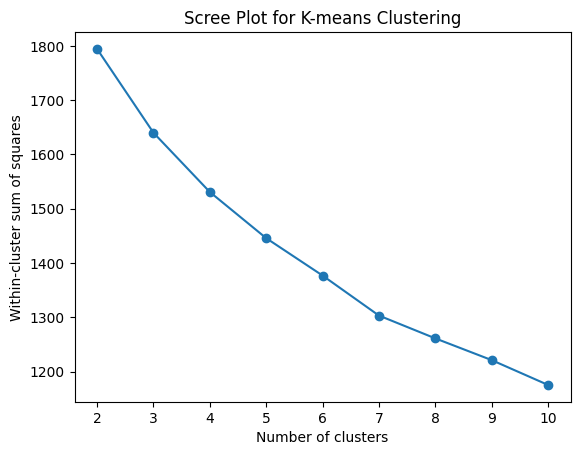

In [20]:
wcss = []  # within cluster sum of squares
k_vals = range(2, 11)

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=4645251, n_init=50).fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(k_vals, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Scree Plot for K-means Clustering')
plt.show()


In [3]:
data = np.array(data)

In [28]:
def plot_clusters(labels, k):
    combs = list(combinations([0, 1, 2], 2))
    n_plots = len(combs)
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, (pc_x, pc_y) in enumerate(combs):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.scatterplot(
            x=data[:, pc_x], 
            y=data[:, pc_y], 
            hue=labels,
            palette="Set2",
            s=40
        )
        plt.xlabel(f"PC{pc_x + 1}")
        plt.ylabel(f"PC{pc_y + 1}")
        plt.title(f"Clusters (k={k}) - PC{pc_x + 1} vs PC{pc_y + 1}")
        plt.legend(title='Cluster', loc='best')

    plt.tight_layout()
    plt.show()

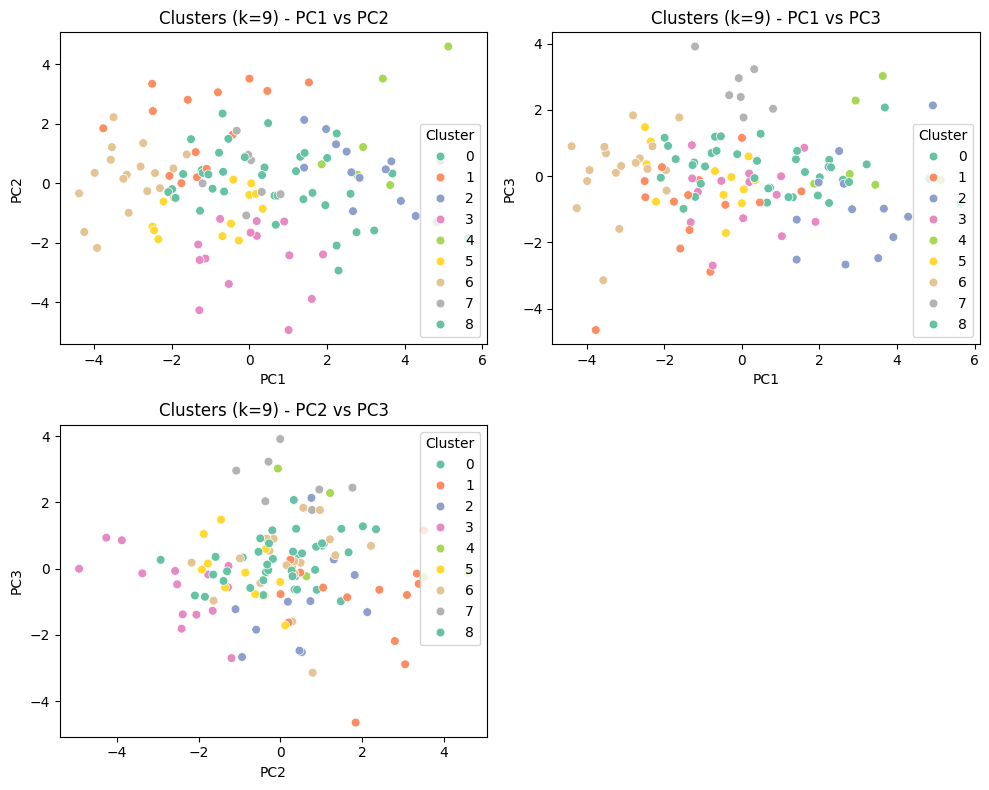

In [29]:
k9_model = KMeans(n_clusters=9, random_state=4645251, n_init=50).fit(data)
plot_clusters(k9_model.labels_, k=9)

<b>Figure 1: Pair-wise principal component plots with k=9

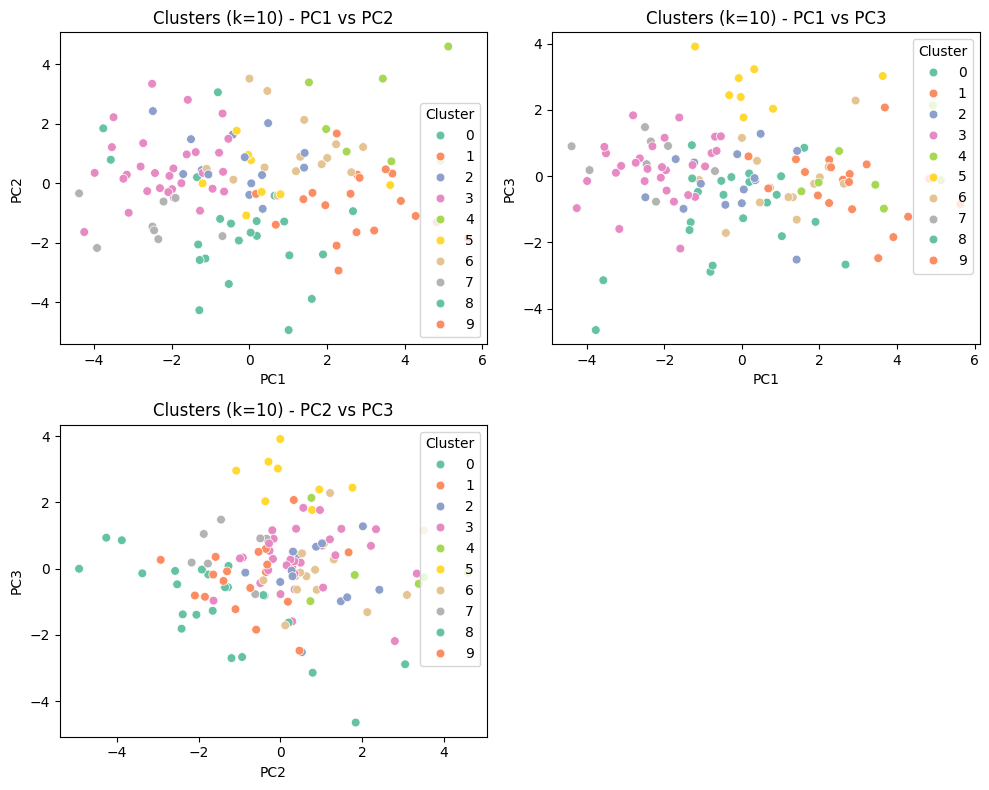

In [30]:
k10_model = KMeans(n_clusters=10, random_state=4645251, n_init=50).fit(data)
plot_clusters(k10_model.labels_, k=10)

<b>Figure 2: Pair-wise principal component plots with k=10

In [32]:
df = pd.DataFrame({
    'k9_label': k9_model.labels_,
    'k10_label': k10_model.labels_
})

contingency_table = pd.crosstab(df['k9_label'], df['k10_label'])
contingency_table

k10_label,0,1,2,3,4,5,6,7,8,9
k9_label,,,,,,,,,,
0,0,0,8,10,0,0,1,1,1,0
1,2,0,2,5,1,0,3,0,1,0
2,0,4,1,0,4,0,3,0,1,0
3,0,0,0,0,0,0,0,0,14,0
4,0,0,0,0,2,1,2,0,0,1
5,0,1,3,0,0,0,1,5,2,0
6,1,0,0,15,0,0,0,2,0,0
7,0,0,0,0,0,7,0,0,0,0
8,0,5,0,0,0,0,4,0,0,8


<b>Figure 3: Contigency table with k=9 and k=10

In [7]:
sampled_indices = np.random.choice(data.shape[0], size=20, replace=False)
sampled_data = data[sampled_indices]

HClust = AgglomerativeClustering
hc_complete = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(sampled_data)
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average').fit(sampled_data)
hc_single = HClust(distance_threshold=0, n_clusters=None, linkage='single').fit(sampled_data)

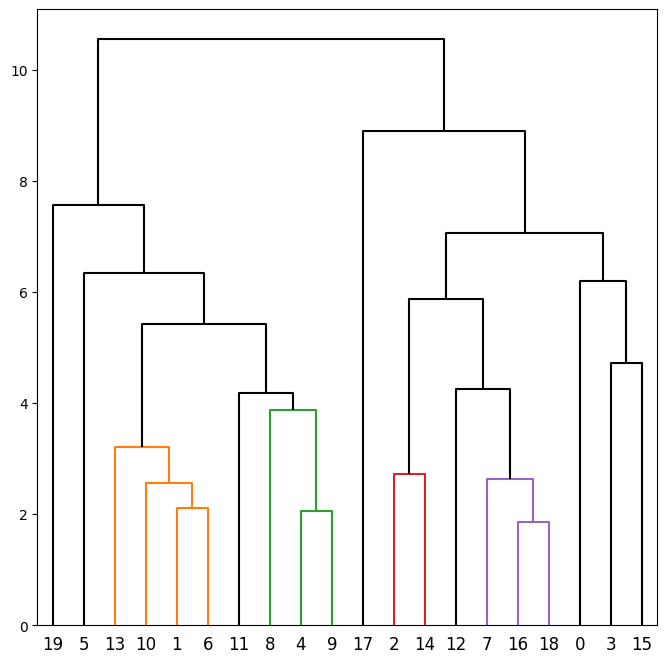

In [12]:
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp ,
ax=ax,
color_threshold=4,
above_threshold_color='black');

<b>Figure 4: Dendogram with complete linkage

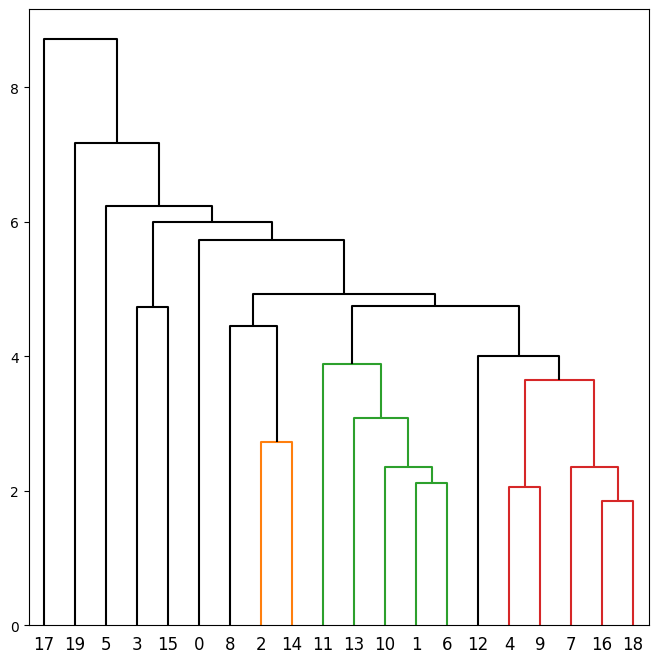

In [13]:
linkage_avg = compute_linkage(hc_avg)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_avg ,
ax=ax,
color_threshold=4,
above_threshold_color='black');

<b>Figure 5: Dendogram with average linkage

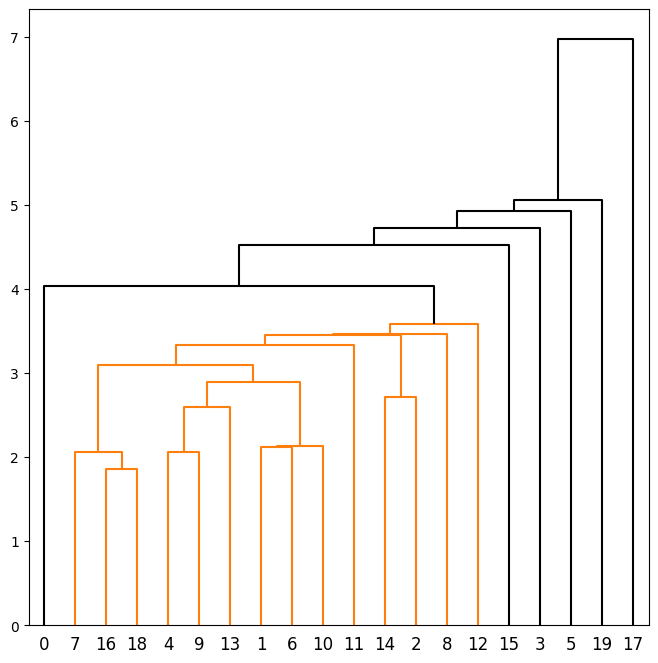

In [14]:
linkage_sing = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_sing ,
ax=ax,
color_threshold=4,
above_threshold_color='black');

<b>Figure 6: Dendogram with average linkage